In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

sb.set_style(style = 'darkgrid')

In [2]:
iris = sb.load_dataset('iris')
iris = iris[:100]

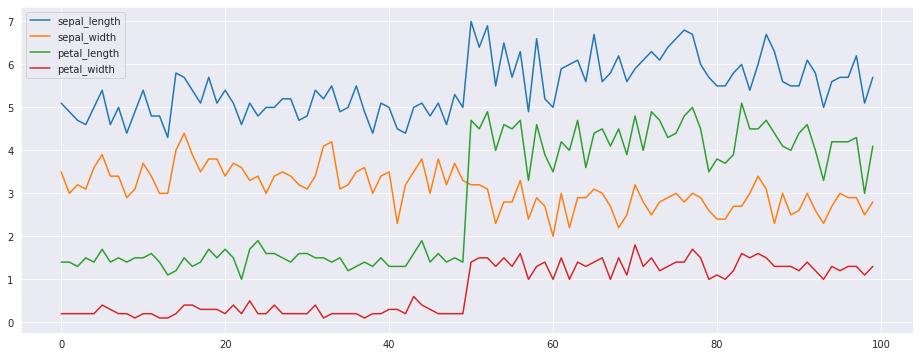

In [3]:
iris.plot(figsize = (16, 6))

In [4]:
iris.drop(['sepal_width', 'petal_width'], inplace = True, axis = 1)

In [5]:
iris

,sepal_length,petal_length,species
0,5.1,1.4,setosa
1,4.9,1.4,setosa
2,4.7,1.3,setosa
3,4.6,1.5,setosa
4,5.0,1.4,setosa
...,...,...,...
95,5.7,4.2,versicolor
96,5.7,4.2,versicolor
97,6.2,4.3,versicolor
98,5.1,3.0,versicolor


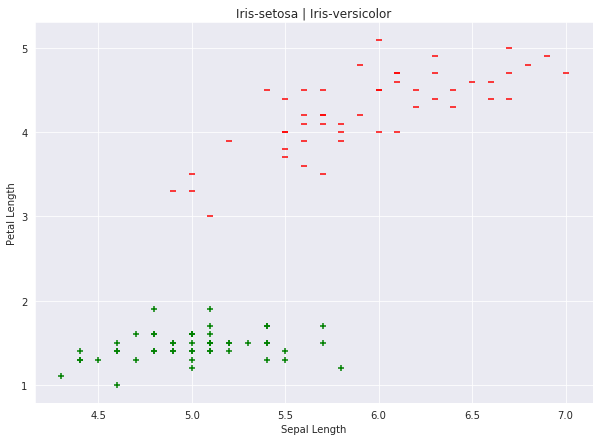

In [6]:
iris_setosa = iris[:50]
iris_versicolor = iris[50:]

plt.figure(figsize = (10, 7))
plt.scatter(iris_setosa['sepal_length'], iris_setosa['petal_length'], color = 'g', marker = '+')
plt.scatter(iris_versicolor['sepal_length'], iris_versicolor['petal_length'], color = 'r', marker = '_')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Iris-setosa | Iris-versicolor')
plt.show()

In [7]:
def assign_class(species):
    if species == 'setosa':
        return 1
    else:
        return -1

In [8]:
iris['species'] = iris.species.apply(assign_class)

In [9]:
iris

,sepal_length,petal_length,species
0,5.1,1.4,1
1,4.9,1.4,1
2,4.7,1.3,1
3,4.6,1.5,1
4,5.0,1.4,1
...,...,...,...
95,5.7,4.2,-1
96,5.7,4.2,-1
97,6.2,4.3,-1
98,5.1,3.0,-1


In [61]:
X = iris.iloc[:, [0, 1]].values
y = iris.iloc[:, [2]].values

y[35][0] = -1
y[65][0] = 1

X_new = np.hstack((np.ones(X.shape[0]).reshape(-1, 1), X))

np.random.seed(100)
weight = np.random.randn(X_new.shape[1]).reshape(1, -1)

alpha = 0.0001
for epoch in range(1, 2000):
    hypothesis = np.dot(weight, X_new.T)
    hypothesis = hypothesis * y.T

    for i in range(len(hypothesis[0])):
        if hypothesis[0][i] <= -1:
            hypothesis[0][i] = -1
        elif hypothesis[0][i] >= 1:
            hypothesis[0][i] = 1
        else:
            pass


    for i in range(len(hypothesis[0])):
        if y.T[0][i] == hypothesis[0][i]:
            weight = weight - (alpha * (2 / epoch) * weight)
        else:
            weight = weight - (alpha * (np.dot(y.T, X_new) - ((2 / epoch) * weight)))
            
    if epoch % 1000 == 0:
        print('Epoch : ', epoch, '  |  Weight: ', weight)
            
weight

Epoch :  1000   |  Weight:  [[-1.50778663  0.31909242  1.06730552]]


array([[-1.48705079,  0.3147041 ,  1.0526274 ]])

In [62]:
hypothesis

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
         1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1.]])

In [46]:
y.T

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1]])

In [29]:
np.dot(y.T, X_new) * np.dot(y.T, X_new)

array([[    0.  ,  2162.25, 19572.01]])

In [27]:
weight.shape

(1, 3)

In [33]:
alpha = 0.0001
epoch = 1

In [34]:
weight + (alpha * (np.dot(y.T, X_new) - ((2 / epoch) * weight)))

array([[-1.74941552,  0.33796187,  1.1388152 ]])

In [11]:
X.shape[0]

100

In [12]:
X_new = np.hstack((np.ones(X.shape[0]).reshape(-1, 1), X))

In [13]:
np.random.seed(100)
weight = np.random.randn(X_new.shape[1]).reshape(1, -1)

In [14]:
weight

array([[-1.74976547,  0.3426804 ,  1.1530358 ]])

In [15]:
weight.shape, X_new.T.shape

((1, 3), (3, 100))

In [16]:
hypothesis = np.dot(weight, X_new.T)
hypothesis

array([[1.61215471, 1.54361863, 1.35977897, 1.55611809, 1.57788667,
        2.06086957, 1.44081451, 1.69319025, 1.37227843, 1.65892221,
        1.83026241, 1.73995775, 1.50935059, 0.99209964, 1.62142383,
        1.93306653, 1.59965525, 1.61215471, 2.16367369, 1.72745829,
        2.06086957, 1.72745829, 0.97960018, 1.95806545, 2.08586849,
        1.80849383, 1.80849383, 1.76172633, 1.64642275, 1.70568971,
        1.73995775, 1.83026241, 1.76172633, 1.74922687, 1.65892221,
        1.34727951, 1.63392329, 1.54361863, 1.25697484, 1.72745829,
        1.46258309, 1.29124289, 1.25697484, 1.80849383, 2.18867261,
        1.50935059, 1.84276187, 1.44081451, 1.79599437, 1.57788667,
        6.06826562, 5.63205022, 6.26460474, 4.74711996, 5.78162184,
        5.39217394, 5.82838934, 3.73438665, 5.81588988, 4.52901225,
        3.99926185, 5.11479928, 4.91846016, 5.75985326, 4.32017367,
        5.61955076, 5.3579059 , 4.96522766, 5.56351414, 4.66608442,
        5.80662076, 4.9527282 , 6.0589965 , 5.75

In [17]:
hypothesis = hypothesis * y.T
hypothesis

array([[ 1.61215471,  1.54361863,  1.35977897,  1.55611809,  1.57788667,
         2.06086957,  1.44081451,  1.69319025,  1.37227843,  1.65892221,
         1.83026241,  1.73995775,  1.50935059,  0.99209964,  1.62142383,
         1.93306653,  1.59965525,  1.61215471,  2.16367369,  1.72745829,
         2.06086957,  1.72745829,  0.97960018,  1.95806545,  2.08586849,
         1.80849383,  1.80849383,  1.76172633,  1.64642275,  1.70568971,
         1.73995775,  1.83026241,  1.76172633,  1.74922687,  1.65892221,
         1.34727951,  1.63392329,  1.54361863,  1.25697484,  1.72745829,
         1.46258309,  1.29124289,  1.25697484,  1.80849383,  2.18867261,
         1.50935059,  1.84276187,  1.44081451,  1.79599437,  1.57788667,
        -6.06826562, -5.63205022, -6.26460474, -4.74711996, -5.78162184,
        -5.39217394, -5.82838934, -3.73438665, -5.81588988, -4.52901225,
        -3.99926185, -5.11479928, -4.91846016, -5.75985326, -4.32017367,
        -5.61955076, -5.3579059 , -4.96522766, -5.5

In [18]:
for i in range(len(hypothesis[0])):
    if hypothesis[0][i] <= -1:
        hypothesis[0][i] = -1
    elif hypothesis[0][i] >= 1:
        hypothesis[0][i] = 1
    else:
        pass

In [19]:
y.T

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1]])

In [20]:
hypothesis

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  0.99209964,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  0.97960018,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1. 

In [21]:
for i in range(len(hypothesis[0])):
    if y.T[0][i] == hypothesis[0][i]:
        weight = weight - 
    else:
        print(False)

SyntaxError: invalid syntax (<ipython-input-21-689d3d983b66>, line 3)

In [63]:
4 >> 1

2

In [64]:
3 >> 1

1

In [65]:
16 >> 1

8

In [69]:
25 >> 3

3

In [70]:
16 << 1

32

In [78]:
%timeit 2560 >> 3

22.1 ns ± 0.0142 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [79]:
%timeit 2560 / 8

22.1 ns ± 0.0157 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
